<a href="https://colab.research.google.com/github/SodisettiRakesh123/cognifyz/blob/main/Task4_cogi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip /content/archive\ \(18\).zip -d /content/

Archive:  /content/archive (18).zip
replace /content/zomato.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/zomato.csv     


✅ Dataset Loaded Successfully!
Total Rows & Columns: (7105, 12)

Columns After Renaming:
 Index(['Unnamed:_0.1', 'Unnamed:_0', 'restaurant_name', 'restaurant_type',
       'rate_out_of_5', 'num_of_ratings', 'avg_cost_two_people',
       'online_order', 'table_booking', 'cuisines_type', 'area',
       'local_address'],
      dtype='object')

Columns Selected for Location Analysis:
 Index(['area', 'local_address', 'avg_cost_two_people', 'rate_out_of_5',
       'num_of_ratings', 'cuisines_type'],
      dtype='object')

✅ Top Cities by Average Rating:
             local_address  rate_out_of_5  avg_cost_two_people  num_of_ratings
49           Lavelle Road       4.063158          1518.421053           30630
72            Sankey Road       4.045455          2886.363636            2558
78         St. Marks Road       3.990476           897.619048           14539
41  Koramangala 3rd Block       3.912500           812.500000            8778
48          Langford Town       3.900000          1000.

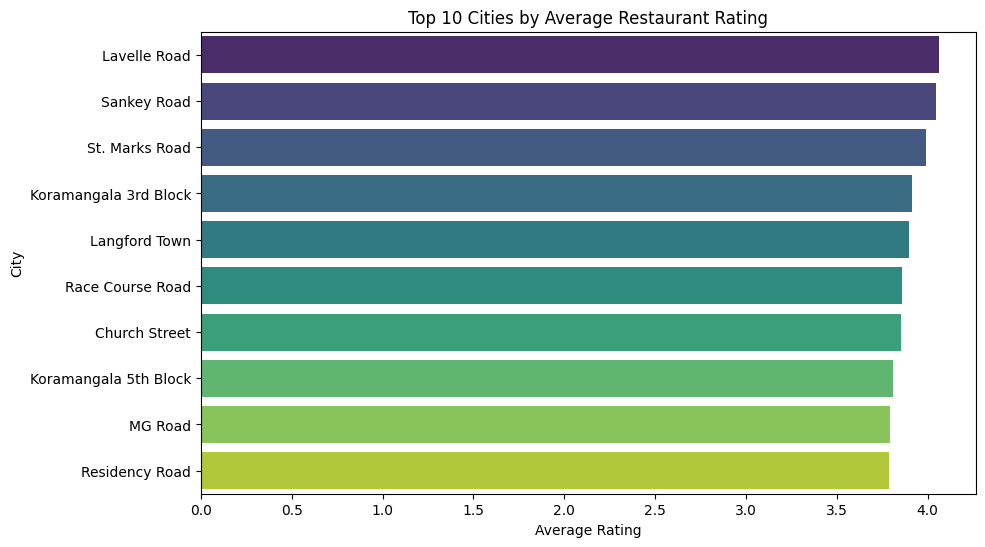


✅ Top Localities by Average Rating:
              area  rate_out_of_5  avg_cost_two_people  num_of_ratings
4    Brigade Road       3.684267           835.969828          153342
20   Lavelle Road       3.630496           860.638298           21918
22   Malleshwaram       3.629602           577.661692           77879
7   Church Street       3.606494           745.454545           12140
11    Indiranagar       3.592308           669.340659          151834


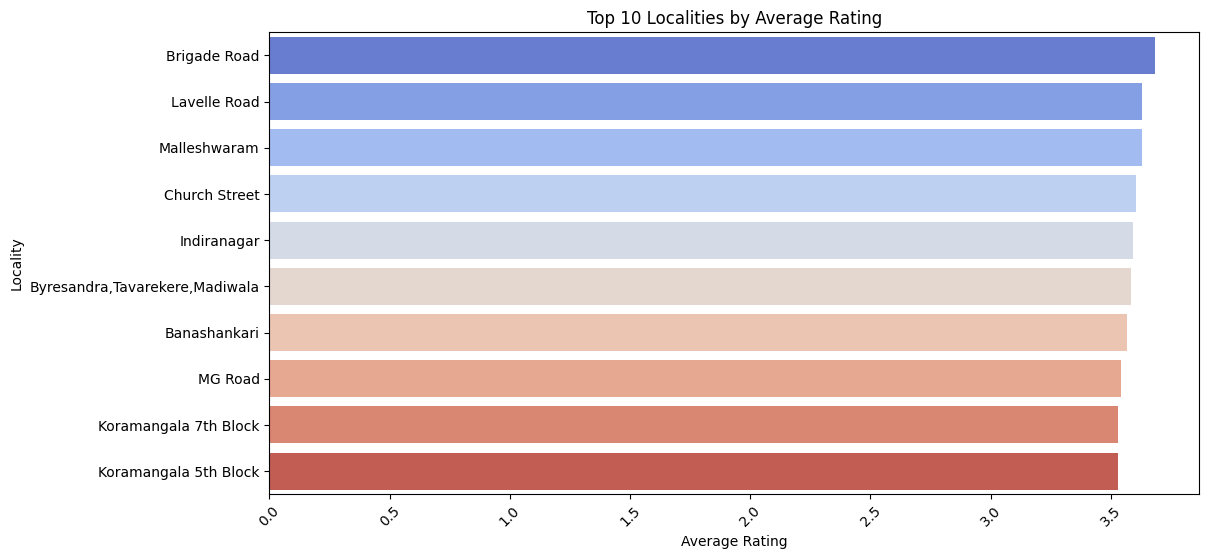

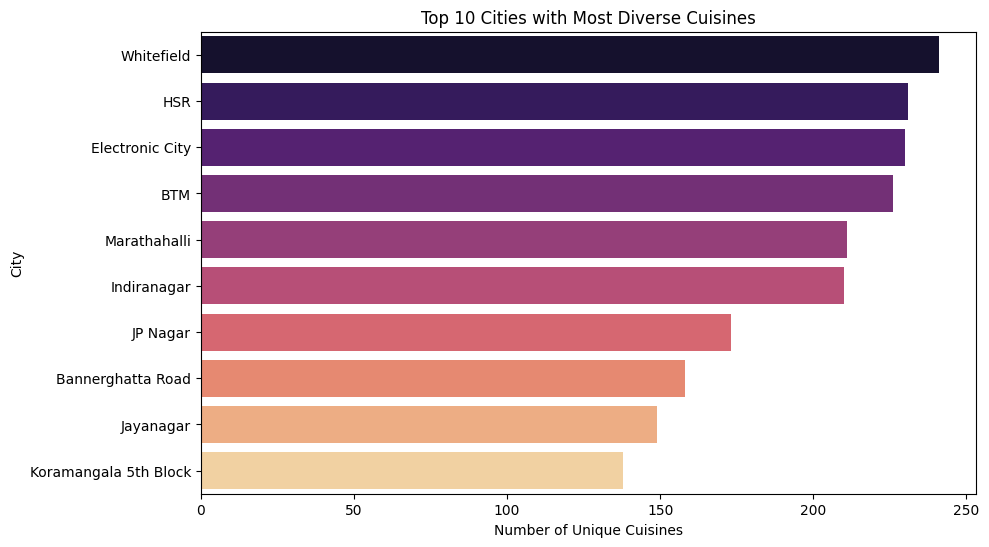

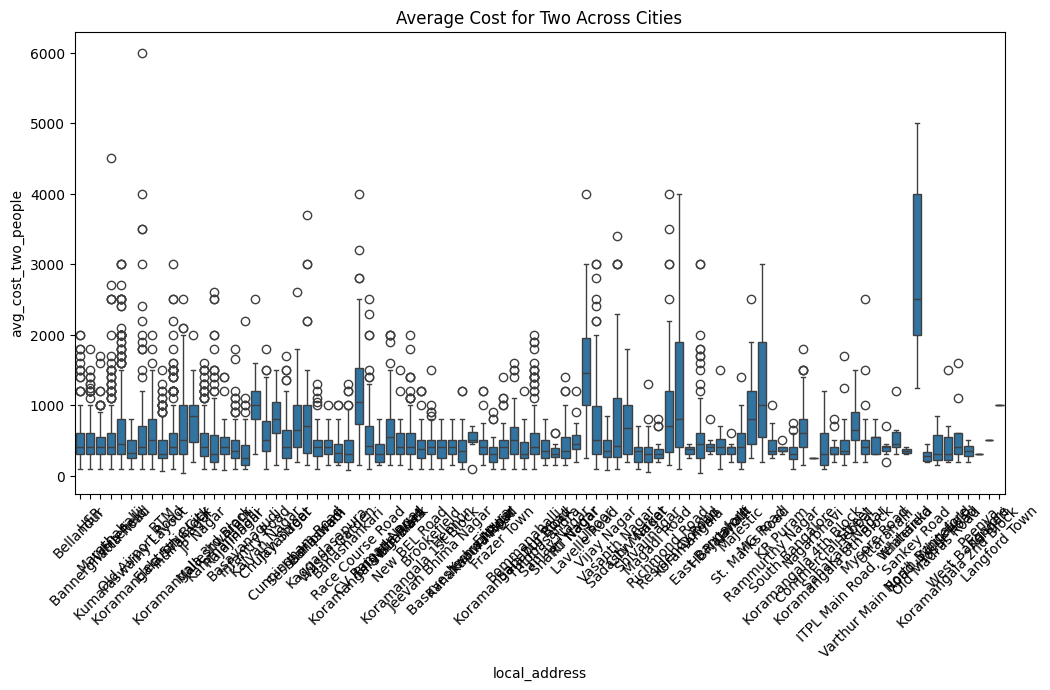


✅ Location-based Analysis Completed!


In [5]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 2. Load Dataset
# -----------------------------
df = pd.read_csv("zomato.csv")
print("✅ Dataset Loaded Successfully!")
print("Total Rows & Columns:", df.shape)

# -----------------------------
# 3. Rename Columns (Safe Names)
# -----------------------------
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
print("\nColumns After Renaming:\n", df.columns)

# -----------------------------
# 4. Keep Useful Columns
# -----------------------------
required_cols = ['area', 'local_address', 'avg_cost_two_people', 'rate_out_of_5', 'num_of_ratings', 'cuisines_type']
df = df[[col for col in required_cols if col in df.columns]]
print("\nColumns Selected for Location Analysis:\n", df.columns)

# -----------------------------
# 5. Handle Missing Values
# -----------------------------
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("Unknown")
    else:
        df[col] = df[col].fillna(df[col].median())

# -----------------------------
# 6. Group Restaurants by City
# -----------------------------
city_group = df.groupby('local_address').agg({
    'rate_out_of_5': 'mean',
    'avg_cost_two_people': 'mean',
    'num_of_ratings': 'sum'
}).reset_index()

city_group = city_group.sort_values(by='rate_out_of_5', ascending=False)

print("\n✅ Top Cities by Average Rating:\n", city_group.head())

plt.figure(figsize=(10, 6))
sns.barplot(data=city_group.head(10), x='rate_out_of_5', y='local_address', palette='viridis', hue='local_address', legend=False)
plt.title("Top 10 Cities by Average Restaurant Rating")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.show()

# -----------------------------
# 7. Group Restaurants by Locality (Location)
# -----------------------------
location_group = df.groupby('area').agg({
    'rate_out_of_5': 'mean',
    'avg_cost_two_people': 'mean',
    'num_of_ratings': 'sum'
}).reset_index()

location_group = location_group.sort_values(by='rate_out_of_5', ascending=False)
print("\n✅ Top Localities by Average Rating:\n", location_group.head())

plt.figure(figsize=(12, 6))
sns.barplot(data=location_group.head(10), x='rate_out_of_5', y='area', palette='coolwarm', hue='area', legend=False)
plt.title("Top 10 Localities by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Locality")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# 8. Cuisine Distribution Across Cities
# -----------------------------
if 'cuisines_type' in df.columns:
    cuisine_group = df.groupby('local_address')['cuisines_type'].nunique().reset_index()
    cuisine_group = cuisine_group.sort_values(by='cuisines_type', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=cuisine_group.head(10), x='cuisines_type', y='local_address', palette='magma', hue='local_address', legend=False)
    plt.title("Top 10 Cities with Most Diverse Cuisines")
    plt.xlabel("Number of Unique Cuisines")
    plt.ylabel("City")
    plt.show()

# -----------------------------
# 9. Price Range Analysis by City
# -----------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='local_address', y='avg_cost_two_people')
plt.title("Average Cost for Two Across Cities")
plt.xticks(rotation=45)
plt.show()

print("\n✅ Location-based Analysis Completed!")